In [4]:
%matplotlib inline
# 导入numpy工具包。
import numpy as np
# 初始化一个2*2的线性相关矩阵。
M = np.array([[1, 2], [2, 4]])
# 计算2*2线性相关矩阵的秩。
np.linalg.matrix_rank(M, tol=None)

1

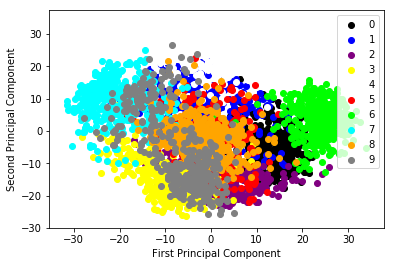

In [5]:
# 导入pandas用于数据读取和处理。
import pandas as pd

# 从互联网读入手写体图片识别任务的训练数据，存储在变量digits_train中。
digits_train = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',
    header=None)

# 从互联网读入手写体图片识别任务的测试数据，存储在变量digits_test中。
digits_test = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',
    header=None)

# 分割训练数据的特征向量和标记。
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

# 从sklearn.decomposition导入PCA。
from sklearn.decomposition import PCA

# 初始化一个可以将高维度特征向量（64维）压缩至2个维度的PCA。
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

# 显示10类手写体数字图片经PCA压缩后的2维空间分布。
from matplotlib import pyplot as plt


def plot_pca_scatter():
    colors = [
        'black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan',
        'orange', 'gray'
    ]
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.values == i]
        py = X_pca[:, 1][y_digits.values == i]
        plt.scatter(px, py, c=colors[i])

    plt.legend(np.arange(0, 10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()


plot_pca_scatter()

In [6]:
# 对训练数据、测试数据进行特征向量（图片像素）与分类目标的分隔。
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# 导入基于线性核的支持向量机分类器。
from sklearn.svm import LinearSVC

# 使用默认配置初始化LinearSVC，对原始64维像素特征的训练数据进行建模，并在测试数据上做出预测，存储在y_predict中。
svc = LinearSVC(max_iter=1e4)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

# 使用PCA将原64维的图像数据压缩到20个维度。
estimator = PCA(n_components=20)

# 利用训练特征决定（fit）20个正交维度的方向，并转化（transform）原训练特征。
pca_X_train = estimator.fit_transform(X_train)
# 测试特征也按照上述的20个正交维度方向进行转化（transform）。
pca_X_test = estimator.transform(X_test)

# 使用默认配置初始化LinearSVC，对压缩过后的20维特征的训练数据进行建模，并在测试数据上做出预测，存储在pca_y_predict中。
pca_svc = LinearSVC(max_iter=1e4)
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
# 从sklearn.metrics导入classification_report用于更加细致的分类性能分析。
from sklearn.metrics import classification_report

# 对使用原始图像高维像素特征训练的支持向量机分类器的性能作出评估。
print(svc.score(X_test, y_test))
print(classification_report(
    y_test, y_predict, target_names=np.arange(10).astype(str)))

# 对使用PCA压缩重建的低维图像特征训练的支持向量机分类器的性能作出评估。
print(pca_svc.score(pca_X_test, y_test))
print(classification_report(
    y_test, pca_y_predict, target_names=np.arange(10).astype(str)))

0.9387868670005565
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       178
           1       0.91      0.93      0.92       182
           2       0.99      0.98      0.98       177
           3       0.96      0.93      0.94       183
           4       0.94      0.97      0.96       181
           5       0.89      0.96      0.92       182
           6       0.99      0.97      0.98       181
           7       0.98      0.91      0.94       179
           8       0.86      0.90      0.88       174
           9       0.88      0.86      0.87       180

   micro avg       0.94      0.94      0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797

0.9298831385642737
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       178
           1       0.89      0.90      0.89       182
           2       0.97      0.98      0